In [156]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
import numpy as np
import collections
from datetime import date
import matplotlib.pyplot as plt
import math
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [157]:
df = pd.read_csv("diabetic_data.csv",sep=",")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [159]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [160]:
  for i in df.columns:
    if df.dtypes[i] == object:
      df[i] = df[i].replace("?",np.nan)
      
  

In [161]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


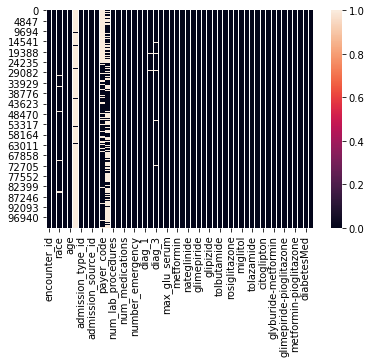

In [162]:
sns.heatmap(df.isnull())

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Con lo que se hizo anteriormente nos damos cuenta que hay columnas que no pueden ser imputadas ya que la cantidad de nulos es muy alta, para las columnas que poseen nulos por encima del 30% serás eliminadas. estas columnas son "Weight", "payer_code" y "Medical_speciality"

In [164]:
df.drop(['weight', 'payer_code',"medical_specialty"], axis = 1, inplace = True) 

In [165]:

df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Segun la informaciòpn que se tiene quedan cuatro variables de tipo categorico por imputar.

In [166]:
#Como son cuatro las columnas a las que les faltan datos se reemplazan estos por el valor mas frecuente, otra opcion es usar metodos de clasificaciòn para reemplazarlos.
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

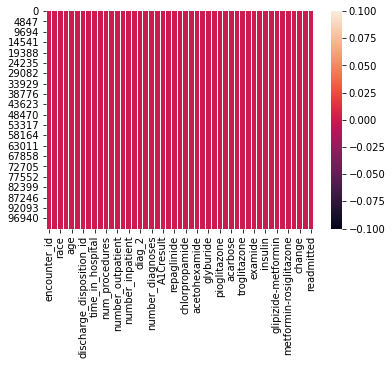

In [167]:
#Como se evidencia ya no se tienen valores faltantes
sns.heatmap(df.isnull())

In [168]:
#Se obtienen un estadisticos basicos de las variables identificadas como numericas
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### En esta parte se centrara a hacer algunas visualizaciones con las variables que se tienen

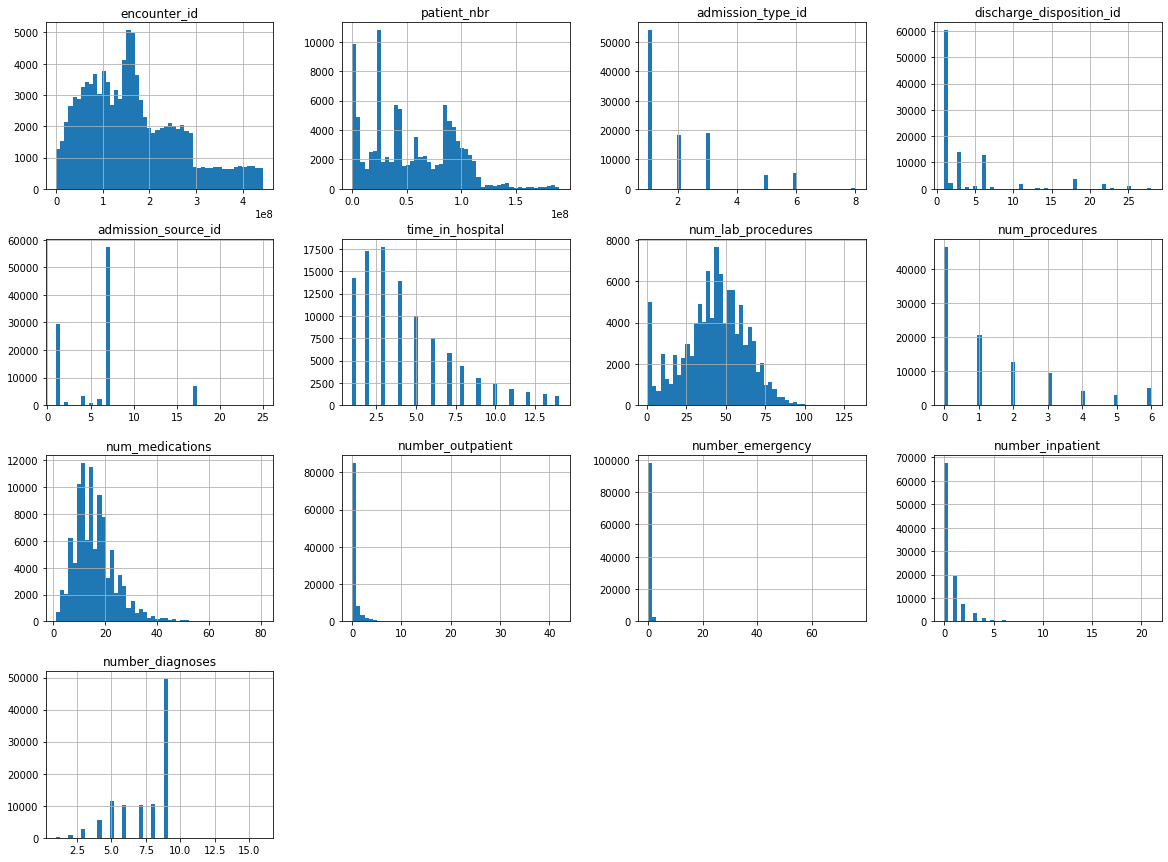

In [169]:
#Histogramas para las variables nuemricas
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [170]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

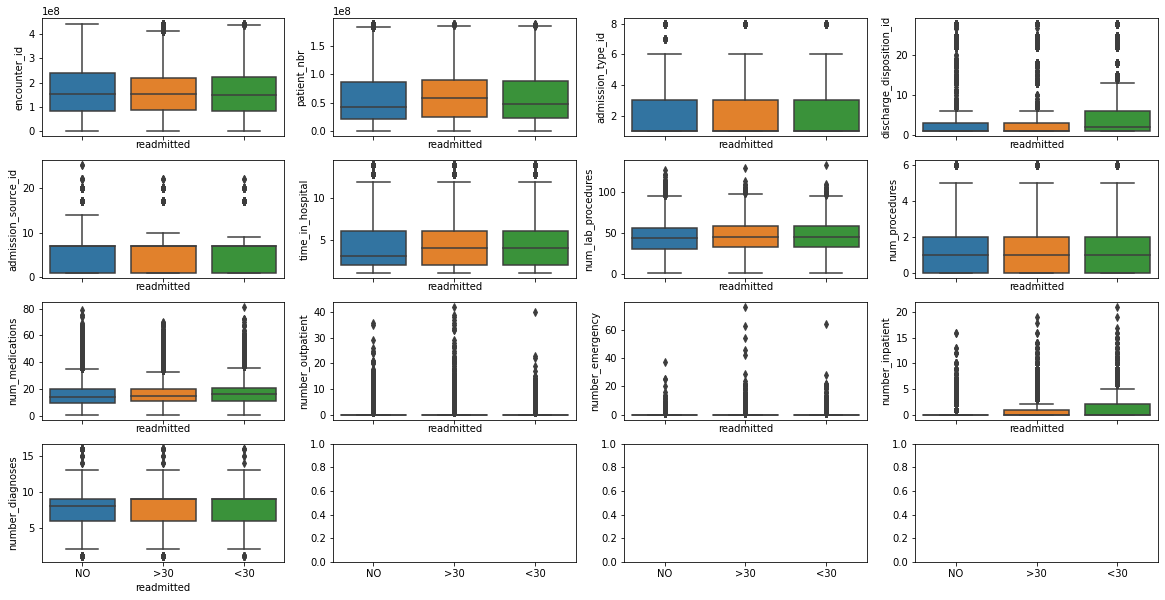

In [171]:
#En la siguiente grafica se ve una relaciòn interesantes entre las variables nuermicas y la avriables objetivo
numeric_columns = []
for i in df.columns:
  if df.dtypes[i] == int:
    numeric_columns.append(i)
fig, axes = plt.subplots(4, 4, sharex=True, figsize=(20,10))

row_i = 0
col_i = 0

for j, ax in zip(numeric_columns[:], axes.flat): 
       
    sns.boxplot(ax= ax, data = df, x = 'readmitted', y = j)

In [172]:
visual = numeric_columns + ["readmitted"]
grafica = df[visual]

In [173]:
#sns.pairplot(grafica, hue = "readmitted",palette = "husl", size = 3, diag_kind = "hist")

### Se hara selecciòn de caracteristicas para el modelo, se iniciaran con las variables de tipo categorico. Para esto se usara la prueba chi cuadrado de pearson

In [174]:
def tabla_cont(columna_obj, columnna):
  tabla_contingencia =pd.crosstab(index=df[columna_obj],
              columns=df[columnna], margins=True)

  tabla_contingencia = tabla_contingencia.transpose().drop(['All'], axis=1)
  tabla_contingencia = tabla_contingencia.transpose()
  return tabla_contingencia

In [175]:
tabla_cont("readmitted", "change").transpose().index.name

'change'

In [176]:
def var(tabla_contingencia):

  
  a = []
  
  stat, p, dof, expected = chi2_contingency(tabla_contingencia)
  #print('dof=%d' % dof)
  #print(expected)

  # interpret test-statistic
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  #print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
  if abs(stat) >= critical:
      #print('Dependent (reject H0)')
      a = [0,tabla_contingencia.transpose().index.name]
  else:
      #print('Independent (fail to reject H0)')
      a = [1,tabla_contingencia.transpose().index.name]
 
  return a

In [177]:
dependientes = []
independientes  = []
for i in df.columns:
  if df.dtypes[i] == object:
    if var(tabla_cont("readmitted", i))[0] == 0:
      dependientes.append(var(tabla_cont("readmitted", i))[1])
    else :
      independientes.append(var(tabla_cont("readmitted", i))[1])

    



In [178]:
print("La lista de variables dependientes " + str(dependientes))
print("La lista de variables independientes " + str(independientes))

La lista de variables dependientes ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed', 'readmitted']
La lista de variables independientes ['nateglinide', 'chlorpropamide', 'acetohexamide', 'glyburide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [179]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

model = ols('number_outpatient ~ num_medications',data = df).fit()
anova_table=anova_lm(model)

In [180]:
numericas = ["readmitted"]
for i in df.columns:
  if df.dtypes[i] == int:
    numericas.append(i)

In [181]:
variables_nuemricas = df[numericas]

In [182]:
from sklearn.preprocessing import LabelEncoder

typess = ('NO','>30','<30')
df1 = pd.DataFrame(typess, columns=['readmitted'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df1['readmitted_encoding'] = labelencoder.fit_transform(df1['readmitted'])


In [183]:
df1

,readmitted,readmitted_encoding
0,NO,2
1,>30,1
2,<30,0


In [184]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,276,250,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [185]:
result = pd.merge(df1, variables_nuemricas, how="left", on=["readmitted"])

In [186]:
result.drop(['readmitted'], axis = 1, inplace = True)

In [187]:
result2 =result[result.columns[0]]
result3 = result[result.columns[1:]]
result3

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
2,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
3,16680,42519267,1,1,7,1,51,0,8,0,0,0,5
4,55842,84259809,3,1,2,4,70,1,21,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443168882,71186301,1,6,7,4,43,0,20,0,0,3,9
101762,443700698,69505299,1,1,7,2,33,0,16,0,0,0,9
101763,443728472,178662695,2,1,1,4,41,0,13,0,0,0,6
101764,443797298,89955270,1,1,7,4,2,0,7,1,0,0,5


In [188]:
from sklearn.feature_selection import SelectKBest, f_classif
selec = SelectKBest(f_classif, k=5)
selec.fit(result3, result2)

SelectKBest(k=5, score_func=<function f_classif at 0x7ff04f0eff28>)

In [189]:
selec.scores_

array([  76.8809475 ,  306.24435243,    6.92075318,  200.75965086,
         86.89377692,  170.33088562,   80.21071773,  103.54126709,
        136.74921081,  355.2326933 ,  573.25719281, 2963.32384313,
        655.4649522 ])

In [190]:
columnasss = selec.get_support(indices=True)


In [191]:
result3_s = result3.iloc[:,columnasss]


In [192]:

model_columns = list(result3_s.columns)+dependientes

df_modelo = df[model_columns]

In [193]:
df_modelo.head()

,patient_nbr,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,8222157,0,0,0,1,Caucasian,Female,[0-10),250.83,276,250,None,None,No,No,No,No,No,No,No,No,No,No,NO
1,55629189,0,0,0,9,Caucasian,Female,[10-20),276,250.01,255,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,>30
2,86047875,2,0,1,6,AfricanAmerican,Female,[20-30),648,250,V27,None,None,No,No,No,Steady,No,No,No,No,No,Yes,NO
3,82442376,0,0,0,7,Caucasian,Male,[30-40),8,250.43,403,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,42519267,0,0,0,5,Caucasian,Male,[40-50),197,157,250,None,None,No,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [194]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
for i in dependientes:
  df_modelo[i] = le.fit_transform(df_modelo[i]) 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [195]:
df_modelo.head()

,patient_nbr,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,8222157,0,0,0,1,2,0,0,124,133,86,2,2,1,1,1,1,1,1,1,1,1,0,2
1,55629189,0,0,0,9,2,0,1,143,79,121,2,2,1,1,1,1,1,1,1,3,0,1,1
2,86047875,2,0,1,6,0,0,2,454,78,766,2,2,1,1,1,2,1,1,1,1,1,1,2
3,82442376,0,0,0,7,2,1,3,554,97,248,2,2,1,1,1,1,1,1,1,3,0,1,2
4,42519267,0,0,0,5,2,1,4,54,24,86,2,2,1,1,1,2,1,1,1,2,0,1,2


### Se hace la reducciòn de dimensionalidad

In [196]:
data_no_classes = df_modelo.drop(columns='readmitted').copy()
data_no_classes.head()

,patient_nbr,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed
0,8222157,0,0,0,1,2,0,0,124,133,86,2,2,1,1,1,1,1,1,1,1,1,0
1,55629189,0,0,0,9,2,0,1,143,79,121,2,2,1,1,1,1,1,1,1,3,0,1
2,86047875,2,0,1,6,0,0,2,454,78,766,2,2,1,1,1,2,1,1,1,1,1,1
3,82442376,0,0,0,7,2,1,3,554,97,248,2,2,1,1,1,1,1,1,1,3,0,1
4,42519267,0,0,0,5,2,1,4,54,24,86,2,2,1,1,1,2,1,1,1,2,0,1


In [197]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(data_no_classes.values)
X_scaled = sc_x.transform(data_no_classes.values)

In [198]:
from sklearn.decomposition import PCA, IncrementalPCA
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_scaled)
varianza_expl = sklearn_pca.explained_variance_ratio_
varianza_expl

array([0.08825345, 0.07099518, 0.05977595, 0.04834478, 0.04715468,
       0.04649751, 0.04596424, 0.04528102, 0.04397397, 0.04353376,
       0.04285017, 0.04206308, 0.04135062, 0.0406472 , 0.04013334,
       0.03881226, 0.0371426 , 0.03660935, 0.0357676 , 0.03153456,
       0.02747882, 0.02550603, 0.02032982])

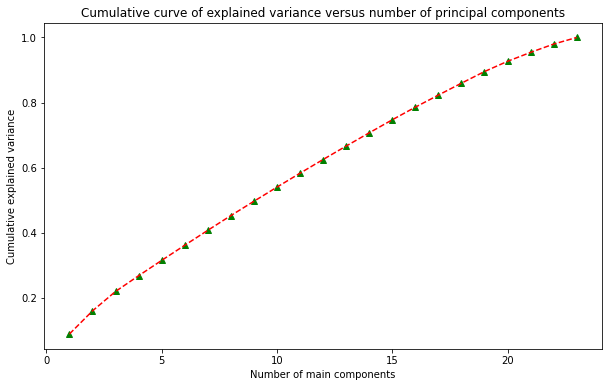

In [199]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

segun lo que se evidencia anteriormente se usaran todas las variables para denerar el modelo.

In [200]:
x=df_modelo.drop('readmitted',axis=1)
y=df_modelo['readmitted']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [201]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=40, min_samples_split=20,min_samples_leaf=30,random_state=1, criterion = 'entropy',class_weight = "balanced_subsample").fit(x_train, y_train)


In [202]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

preds = clf.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.21      0.29      0.24      2817
           1       0.45      0.42      0.44      8923
           2       0.66      0.63      0.65     13702

    accuracy                           0.52     25442
   macro avg       0.44      0.45      0.44     25442
weighted avg       0.54      0.52      0.53     25442



In [203]:
"""from sklearn.svm import SVC
clf = SVC(C=1,gamma=0.1)
eval_modelo_clasificacion(clf,x_train,x_test,y_train,y_test)"""

'from sklearn.svm import SVC\nclf = SVC(C=1,gamma=0.1)\neval_modelo_clasificacion(clf,x_train,x_test,y_train,y_test)'

In [204]:
"""from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

eval_modelo_clasificacion(clf,x_train,x_test,y_train,y_test)"""

'from sklearn.metrics import accuracy_score,recall_score,precision_score\nfrom sklearn import metrics\nfrom sklearn.model_selection import cross_val_score\n\neval_modelo_clasificacion(clf,x_train,x_test,y_train,y_test)'

In [212]:

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='saga', max_iter = 4000,class_weight = "balanced").fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [213]:
preds = model1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2817
           1       0.35      1.00      0.52      8923
           2       0.54      0.00      0.01     13702

    accuracy                           0.35     25442
   macro avg       0.33      0.33      0.18     25442
weighted avg       0.43      0.35      0.19     25442



In [211]:
preds = model1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.13      0.00      0.00      2817
           1       0.35      0.99      0.52      8923
           2       0.51      0.01      0.01     13702

    accuracy                           0.35     25442
   macro avg       0.33      0.33      0.18     25442
weighted avg       0.41      0.35      0.19     25442



In [102]:
preds = model1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.11      0.09      0.10       935
           1       0.45      0.32      0.37      2782
           2       0.60      0.73      0.66      4594

    accuracy                           0.52      8311
   macro avg       0.39      0.38      0.38      8311
weighted avg       0.49      0.52      0.50      8311



In [ ]:
preds = model1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.19      0.36      0.24      2813
           1       0.42      0.27      0.33      8953
           2       0.63      0.65      0.64     13676

    accuracy                           0.49     25442
   macro avg       0.41      0.43      0.40     25442
weighted avg       0.51      0.49      0.49     25442



In [ ]:
"""from sklearn.svm import SVC
clf = SVC(C=1,gamma=0.1,class_weight = "balanced").fit(x_train, y_train)"""


In [ ]:
"""preds = clf.predict(x_test)
print(classification_report(y_test, preds))"""

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      2813
           1       0.60      0.01      0.02      8953
           2       0.54      1.00      0.70     13676

    accuracy                           0.54     25442
   macro avg       0.49      0.34      0.24     25442
weighted avg       0.54      0.54      0.38     25442

